<a href="https://colab.research.google.com/github/adityasai2002/song_recommendation/blob/main/Song_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import copy
import warnings
warnings.filterwarnings("ignore")
plotly.offline.init_notebook_mode (connected = True)

In [ ]:
data=pd.read_csv('songs_v1.csv')

In [ ]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [ ]:
cols=list(data.columns[11:])
del cols[7]

In [ ]:
df=copy.deepcopy(data)
df.drop(columns=cols,inplace=True)

In [ ]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

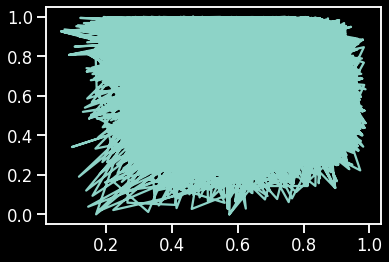

In [ ]:
plt.plot(df.danceability, df.energy)

In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
x=list(data.corr().columns)
y=list(data.corr().index)
values=np.array(data.corr().values)
fig = go.Figure(data=go.Heatmap(
    z=values,
    x=x,
    y=y,


                   hoverongaps = False))
fig.show()

In [ ]:
data=data.dropna(subset=['song_name'])

In [ ]:
# Creating a new dataframe with required features
df=data[data.columns[:11]]
df['genre']=data['genre']
df['time_signature']=data['time_signature']
df['duration_ms']=data['duration_ms']
df['song_name']=data['song_name']

In [ ]:
x=df[df.drop(columns=['song_name','genre']).columns].values
scaler = StandardScaler().fit(x)
X_scaled = scaler.transform(x)
df[df.drop(columns=['song_name','genre']).columns]=X_scaled

In [ ]:
# This is a function to find the closest song name from the list
def find_word(word,words):
    t=[]
    count=0
    if word[-1]==' ':
        word=word[:-1]
    for i in words:
        if word.lower() in i.lower():
            t.append([len(word)/len(i),count])
        else:
            t.append([0,count])
        count+=1
    t.sort(reverse=True)
    return words[t[0][1]]

In [ ]:
# Making a weight matrix using euclidean distance
def make_matrix(data,song,number):
    df=pd.DataFrame()
    data.drop_duplicates(inplace=True)
    songs=data['song_name'].values
#    best = difflib.get_close_matches(song,songs,1)[0]
    best=find_word(song,songs)
    print('The song closest to your search is :',best)
    genre=data[data['song_name']==best]['genre'].values[0]
    df=data[data['genre']==genre]
    x=df[df['song_name']==best].drop(columns=['genre','song_name']).values
    if len(x)>1:
        x=x[1]
    song_names=df['song_name'].values
    df.drop(columns=['genre','song_name'],inplace=True)
    df=df.fillna(df.mean())
    p=[]
    count=0
    for i in df.values:
        p.append([distance.euclidean(x,i),count])
        count+=1
    p.sort()
    for i in range(1,number):
        print(song_names[p[i][1]])


In [ ]:
a=input('Please enter The name of the song :')
b=int(input('Please enter the number of recommendations you want: '))
make_matrix(df,a,b)

Please enter The name of the song :jingle bells
Please enter the number of recommendations you want: 20
The song closest to your search is : Can't Hold On
Outlawz
Born Day
Facade Records
20 Joints
Be Easy
Nightcrawler (feat. Method Man)
Unbelievable - 2005 Remaster
Dicka Was
Always On Time
N 2 Gether Now
No. 99
The Let Out (feat. Nana Kwabena)
21 Questions
Wait a Minute!
Stressed Out
BLACK BALLOONS | 13LACK 13ALLOONZ [FEAT. TWELVE'LEN & GOLDLINK | TWELVE'LEN + GOLDL1NK]
Crazy In Love (feat. Jay-Z)
Work
Break Ya Neck
